# PGF5005 — Mecânica Clássica · Itens 4.5 e 4.6  
**Pêndulo simples com *Euler simplético* (Euler–Cromer)**

Este caderno complementa os itens 4.3–4.4, agora focando em:

- **4.5**: Construir os **gráficos $p(t)\times q(t)$** (diagramas de fase) para as **duas condições iniciais**
  (librar e rotacionar), colocando no **mesmo gráfico** as **três curvas** de $\Delta t\in\{10^{-1},10^{-2},10^{-3}\}$.
- **4.6**: Escrever explicitamente as fórmulas de $q^{(n+1)}$ e $p^{(n+1)}$ do **Euler simplético** para o pêndulo simples,
  conforme as Equações (9) do texto.


## 1) Modelo, energia e integrador (Euler simplético)

In [4]:
import math
import numpy as np
import matplotlib.pyplot as plt

def dU_dq(q):  # U(q) = -cos q
    return math.sin(q)

def H(q, p):
    return 0.5*p*p - math.cos(q)

def euler_symplectic_step(q, p, dt):
    # q^{n+1} = q^n + dt * p^n
    q_next = q + dt * p
    # p^{n+1} = p^n - dt * sin(q^{n+1})
    p_next = p - dt * dU_dq(q_next)
    return q_next, p_next

def integrar_symplectic(q0, p0, dt, T):
    n = int(np.ceil(T/dt))
    q = np.empty(n+1); p = np.empty(n+1); t = np.empty(n+1); E = np.empty(n+1)
    q[0]=q0; p[0]=p0; t[0]=0.0; E[0]=H(q0,p0)
    for k in range(n):
        q[k+1], p[k+1] = euler_symplectic_step(q[k], p[k], dt)
        t[k+1] = (k+1)*dt
        E[k+1] = H(q[k+1], p[k+1])
    return t,q,p,E


## 2) Utilitário de fase p × q (três curvas no mesmo gráfico)

In [5]:
def plot_fase_multi(curvas, titulo):
    """curvas: lista de tuplas (q, p, label)"""
    plt.figure()
    for q, p, label in curvas:
        plt.plot(q, p, label=label, lw=1.2)
    plt.xlabel('q(t)')
    plt.ylabel('p(t)')
    plt.title(titulo)
    plt.legend()
    plt.show()


## 3) Cenários e execução (Item 4.5)

Usamos as mesmas condições dos itens anteriores:  
- **Librar:** $q_0=0.5,\ p_0=0$ (energia $H<1$)  
- **Rotacionar:** $q_0=0,\ p_0=2.2$ (energia $H>1$)

Passos de tempo: $\Delta t = 10^{-1},10^{-2},10^{-3}$.

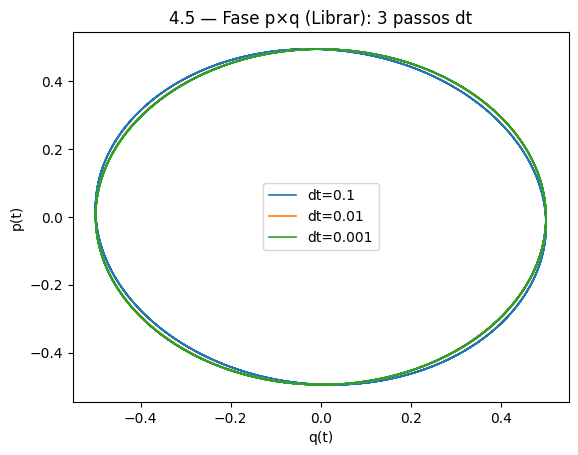

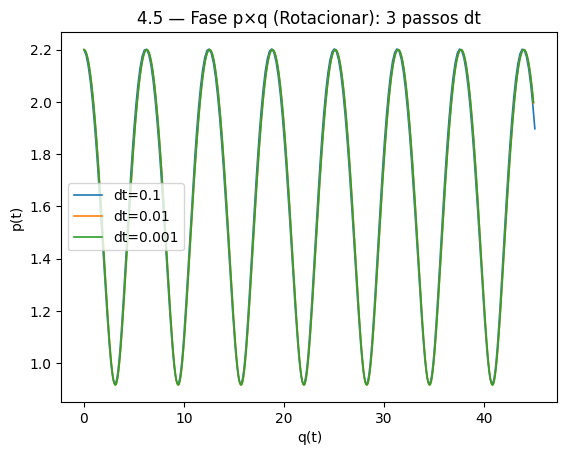

In [6]:
dt_list = [1e-1, 1e-2, 1e-3]
T = 30.0

def curvas_fase(q0,p0, dt_vals=dt_list, T_sim=T):
    out = []
    for dt in dt_vals:
        t,q,p,E = integrar_symplectic(q0,p0,dt,T_sim)
        out.append((q,p,f"dt={dt:g}"))
    return out

# Librar
curvas_lib = curvas_fase(0.5, 0.0)
plot_fase_multi(curvas_lib, "4.5 — Fase p×q (Librar): 3 passos dt" )

# Rotacionar
curvas_rot = curvas_fase(0.0, 2.2)
plot_fase_multi(curvas_rot, "4.5 — Fase p×q (Rotacionar): 3 passos dt" )


## 4) Item 4.6 — fórmulas explícitas do **Euler simplético** (Eq. 9)

Para o pêndulo simples adimensional com \(H(q,p)=\tfrac{p^2}{2}-\cos q\) e \(H=K(p)+U(q)\) separável:

$$
\frac{\partial H}{\partial p}=p,\qquad \frac{\partial H}{\partial q}=\sin q.
$$

O **método de Euler simplético** (Euler–Cromer), conforme as Equações (9) do texto, fica:

$$
\boxed{
\begin{aligned}
q^{(n+1)} &= q^{(n)} + \Delta t\,\frac{\partial H}{\partial p}\Big|_{p^{(n)}} 
          = q^{(n)} + \Delta t\,p^{(n)}, \\[4pt]
p^{(n+1)} &= p^{(n)} - \Delta t\,\frac{\partial H}{\partial q}\Big|_{q^{(n+1)}} 
          = p^{(n)} - \Delta t\,\sin\!\big(q^{(n+1)}\big).
\end{aligned}}
$$

> Observação: a ordem é crucial para o caráter simplético: primeiro atualizamos $q$ com $p^{(n)}$,
> depois atualizamos $p$ usando $q^{(n+1)}$.
